<a href="https://colab.research.google.com/github/gaberm/TSA/blob/master/Forecasting_TSA_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Forecasting - Principles & Practices
by Rob J Hyndman and George Athanasopoulos - Monash University, Australia

Current Progress - https://otexts.com/fpp2/ts-objects.html

Python Exercises:
https://github.com/mscharth/forecasting

Useful links

https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000

http://rstudio-pubs-static.s3.amazonaws.com/311446_08b00d63cc794e158b1f4763eb70d43a.html

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [0]:
#get the data
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2019-07-23 09:12:59--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.1’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2019-07-23 09:13:00 (41.2 MB/s) - ‘airline-passengers.csv.1’ saved [2180/2180]



In [0]:
#load the data
data = pd.read_csv('airline-passengers.csv')
print(data.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


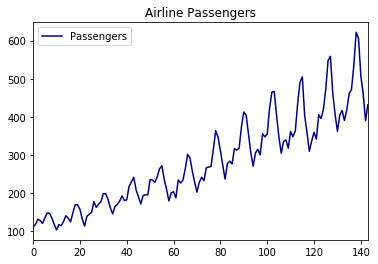

In [0]:
data.plot( title='Airline Passengers', colormap='jet')

In [0]:
data.dtypes


from datetime import datetime
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

You can see that now the data type is ‘datetime64[ns]’.Now let’s just make it into a series rather than a data frame ( this would make it easier for the blog explanation )

In [0]:
#convert to time series:
ts = data['Passengers']
ts.head(10)
# ts.dtypes

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: Passengers, dtype: int64

###Let’s explore the various properties date-time based index:

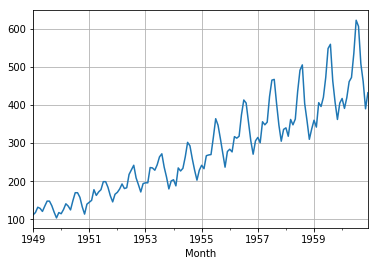

In [0]:
ts.plot(grid=True)

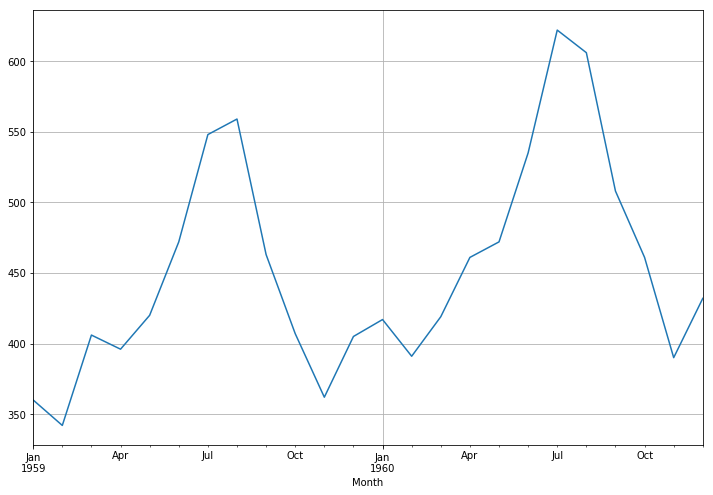

In [0]:
# A Closer look
import matplotlib
from datetime import datetime

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

start_date = datetime(1959,1,1)
end_date = datetime(1960,12,1)

# data[ (start_date <= data.index ) & (data.index <= end_date)].plot(grid=True)
ts[ (start_date <= ts.index ) & (ts.index <= end_date)].plot(grid=True)

As we can see in the plot, there’s usually a spike between July and September which begins to drop by October, which implies that more people travel between July and September and probably travel less from October.

Remember we mentioned that there’s an upward trend and a seasonal pattern in our observation? There are usually a number of components [Scroll up to see explanation of Time Series components] in most Time Series analysis. Hence, what we need to do now is use Decomposition techniques to to deconstruct our observation into several components, each representing one of the underlying categories of patterns.

### Decomposition of Time Series

There are a couple of models to consider during the Decomposition of Time Series data.
1. Additive Model: This model is used when the variations around the trend does not vary with the level of the time series. Here the components of a time series are simply added together using the formula: 


> y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)


2. Multiplicative Model: Is used if the trend is proportional to the level of the time series. Here the components of a time series are simply multiplied together using the formula: 
>y(t) = Level(t) * Trend(t) * Seasonality(t) *Noise(t)

For the sake of this tutorial, we will use the additive model because it is quick to develop, fast to train, and provide interpretable patterns. We also need to import statsmodels which has a tsa (time series  analysis) package as well as the seasonal_decompose() function we need:

### Decomposition

**1. First we try 'Additive' decomposition modelling**

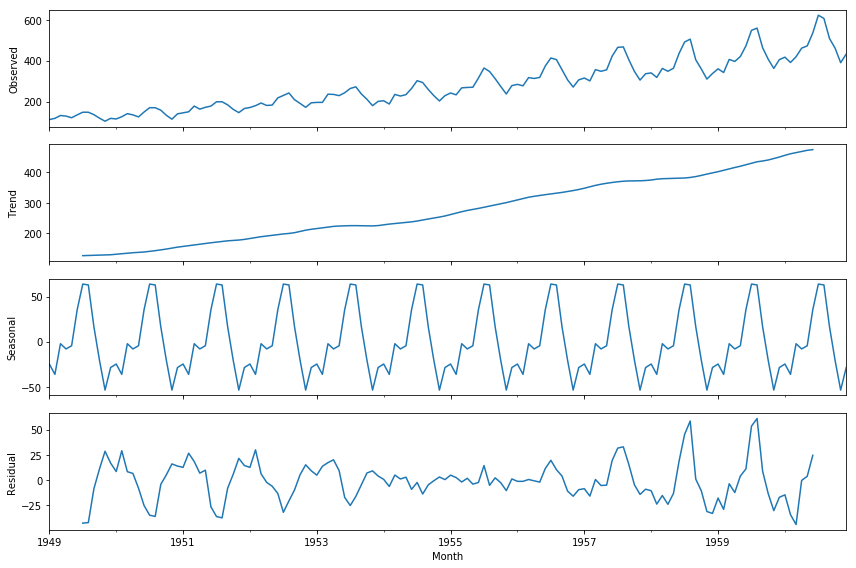

In [0]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]

**2. Next we try 'Multiplicative' decomposition**

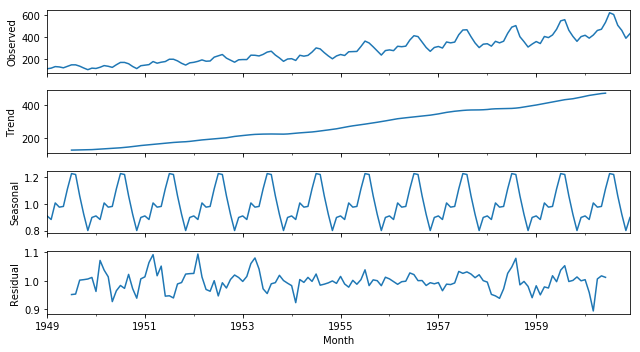

In [0]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model = 'multiplicative')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]

Now we have a much clearer plot showing us that the trend is going up, and the seasonality following a regular pattern.

One last thing we will do is plot the trend alongside the observed time series. To do this, we will use Matplotlib’s .*YearLocator()* function to set each year to begin from the month of January *month=1* , and *month* as the minor locator showing ticks for every 3 months *(intervals=3)*. 

Then we plot our dataset (and gave it blue color) using the index of the dataframe as *x-axis* and the number of Passengers for the *y-axis*.

We did the same for the trend observations which we plotted in red color.


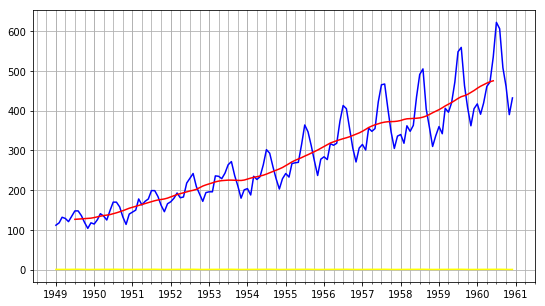

In [0]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(data.index, data['Passengers'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.plot(decomposition.seasonal.index, decomposition.seasonal, c='yellow') # Irrelevant due to the very small value it has

In [0]:
plt.acorr(data[ (start_date <= data.index ) & (data.index <= end_date)], maxlags=9)

datetime.datetime(1959, 1, 1, 0, 0)

In [0]:
# !pip install pandas --upgrade

In [0]:
# import ggplot

# from ggplot import meat
# meat_lng = pd.melt(meat, id_vars=['date'])
# ggplot(aes(x='date', y='value', colour='variable'), data=meat_lng) + geom_line()


# ggplot(aes(x='date', y='value', colour='variable'), data=meat_lng) + \
#     stat_smooth(span=0.10) + \
#     ggtitle("Smoothed Livestock Production")
